# Report: Distribution of Energy and Gas Usage over the Day
Responsible for this report: Vasiliki Gkika (s3697428), Pelagia Kalpakidou (s3744825)

## Report's question:
'What is the distribution of the energy and gas usage over the day in 2023?'

This report's goal is to examine how energy and gas are used during the course of a day. The dataset includes data on timestamps, gas usage, and energy consumption. The analysis attempts to provide light on the patterns and shifts in daily energy and gas use.

## Get Data through class

We created a class named HomeMessagesDB  from which we communicate with the database.\
The data of the database should be inserted in it via the command Prompt(cmd) before executing the following code in this notebook.\
All the scripts(home_messages_db,p1e.py,p1g.py) and folders with data files(P1e,P1g) should be the same directory.\
Type in cmd: ''' cd directory/of/the/scripts ''' \
Then type to insert all data from the P1e folder : ''' python p1e.py -d sqlite:///myhome.db P1e-*.csv.gz ''' \
Then type to insert all data from the P1g folder : ''' python p1g.py -d sqlite:///myhome.db P1g-*.csv.gz '''

Then you can continue with executing the following code windows and go through the report

## Import Libraries and create instance of class

In [73]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sb
import matplotlib.pyplot as plt
from home_messages_db import HomeMessagesDB

## Pass query to the instance of the class to read the data from the database

In [74]:

db_instance = HomeMessagesDB(dbfilename = "sqlite:///myhome.db") #initialize class
db_instance.create_database() #create database
db_instance.insert_sources()

#data should be insert via the cmd before executing the next lines

p1g_data=db_instance.db_pass_querry("SELECT * FROM p1g ORDER BY EpochId")
p1e_data=db_instance.db_pass_querry("SELECT * FROM p1e ORDER BY EpochId")

duplicatesG = p1g_data.duplicated()
num_duplicatesG = duplicatesG.sum()
print(f"Number of duplicates found in p1g and deleted: {num_duplicatesG}")
# Remove duplicates
p1g_data.drop_duplicates(inplace=True)

duplicatesE = p1e_data.duplicated()
num_duplicatesE = duplicatesE.sum()
print(f"Number of duplicates found in p1e and deleted: {num_duplicatesE}")
# Remove duplicates
p1e_data.drop_duplicates(inplace=True)

Number of duplicates found in p1g and deleted: 0
Number of duplicates found in p1e and deleted: 0


So, indeed no duplicates as expected since we made sure that the tables of the database are without duplicates!

## Data Manipulation

In [75]:
merged = pd.merge(p1g_data, p1e_data, on=['EpochId'])
merged = merged.iloc[:, [0,2,4,5]]
merged['Date'] = [datetime.datetime.fromtimestamp(d) for d in merged['EpochId']]
merged['Time'] = merged['Date'].dt.time
merged['Time'] = merged['Time'].astype(str)
merged = merged.drop(['EpochId'], axis =1) 

Investigation into the number of observations for each time point. We checked it for the 'Time' variable:

In [76]:
pd.set_option('display.max_rows', None)
merged['Time'].value_counts()


Time
16:00:00    126
07:45:00    126
00:00:00    125
11:15:00    125
15:45:00    125
15:30:00    125
15:15:00    125
15:00:00    125
14:45:00    125
14:30:00    125
14:15:00    125
14:00:00    125
13:45:00    125
13:30:00    125
13:15:00    125
13:00:00    125
12:45:00    125
12:30:00    125
12:15:00    125
00:15:00    125
11:45:00    125
16:15:00    125
16:30:00    125
16:45:00    125
19:30:00    125
21:30:00    125
21:15:00    125
21:00:00    125
20:45:00    125
20:30:00    125
20:15:00    125
20:00:00    125
19:45:00    125
19:15:00    125
17:00:00    125
19:00:00    125
18:45:00    125
18:30:00    125
18:15:00    125
18:00:00    125
17:45:00    125
17:30:00    125
17:15:00    125
11:30:00    125
12:00:00    125
11:00:00    125
03:30:00    125
05:15:00    125
05:00:00    125
04:45:00    125
10:45:00    125
04:15:00    125
04:00:00    125
03:45:00    125
03:15:00    125
05:45:00    125
03:00:00    125
01:45:00    125
01:30:00    125
01:15:00    125
01:00:00    125
00:45:00    125
00:

We notice that the number of observations remains relatively consistent across all time intervals.

The variables TotalGas, T1, and T2 represent the cumulative consumption of gas and electricity, with usage being added up on a daily basis. To calculate the daily usage we used the following code:

In [79]:
merged1=merged.set_index(['Date', 'Time']).diff()

mean_values = merged1.groupby('Time').mean()

## Data Overview:

The dataset consists of the following columns:

- Date: Date and time of the measurement
- Time: Time of the measurement
- Hour: Hour of the measurement
- TotalGas: Total gas usage
- T1: Total energy usage \[kWh\] in low-cost hours 
- T2: Total energy usage \[kWh\] in high-cost hours

## Visualizations

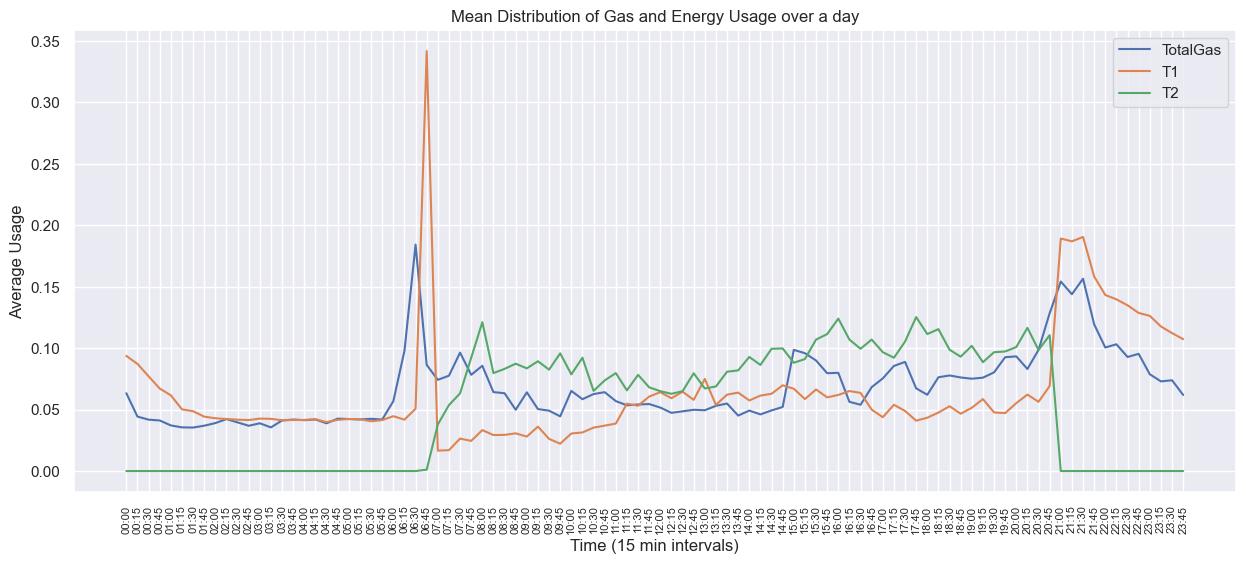

In [80]:
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(mean_values.index, mean_values['TotalGas'], label='TotalGas')
ax.plot(mean_values.index, mean_values['T1'], label='T1')
ax.plot(mean_values.index, mean_values['T2'], label='T2')
ax.set_xlabel('Time (15 min intervals)')
ax.set_ylabel('Average Usage')
ax.set_title('Mean Distribution of Gas and Energy Usage over a day')
ax.legend()

uni_time = merged1.index.get_level_values('Time').unique()
ax.set_xticks(range(len(uni_time)))
ax.set_xticklabels([label[:-3] for label in uni_time], rotation=90, fontsize=8)

plt.show()

The plot above illustrates the daily distribution of Gas and Electricity Usage during the initial four months of 2023.

## P1g: Gas Usage

### P1g Visualization  

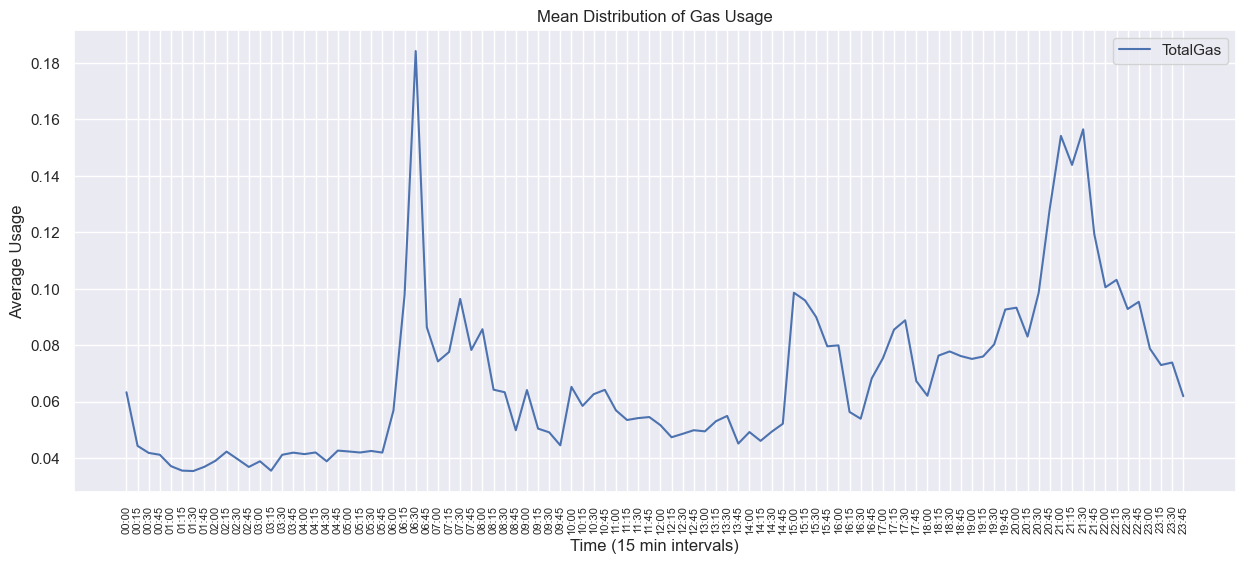

In [81]:
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(mean_values.index, mean_values['TotalGas'], label='TotalGas')
ax.set_xlabel('Time (15 min intervals)')
ax.set_ylabel('Average Usage')
ax.set_title('Mean Distribution of Gas Usage')
ax.legend()

uni_time = merged1.index.get_level_values('Time').unique()
ax.set_xticks(range(len(uni_time)))
ax.set_xticklabels([label[:-3] for label in uni_time], rotation=90, fontsize=8)

plt.show()

### Comments on P1g Visualization 


The provided plot offers valuable insights into the average gas usage patterns, revealing a consistent range of 0.04 to 0.18 m3. 
During the time period from 00:15 to 05:45, the average gas usage reaches its lowest point within this range, hovering around 0.04 m3. 
At 06:30, a significant increase in gas consumption is observed, marking the highest point in the average gas usage throughout the day. Subsequently, the average gas usage gradually declines and remains relatively stable at around 0.06 m3 until 14:45. Additionally, the second highest gas usage is observed at 21:30, suggesting another notable peak in gas consumption during the evening hours.
Therefore, our analysis leads us to the conclusion that the peak gas consumption occurs during the waking hours and before bedtime. Also, there is a notable surge in gas usage during the afternoon.

## P1e: Energy Usage

### P1e Visualization 1
### Energy usage in low-cost hours ('T1')


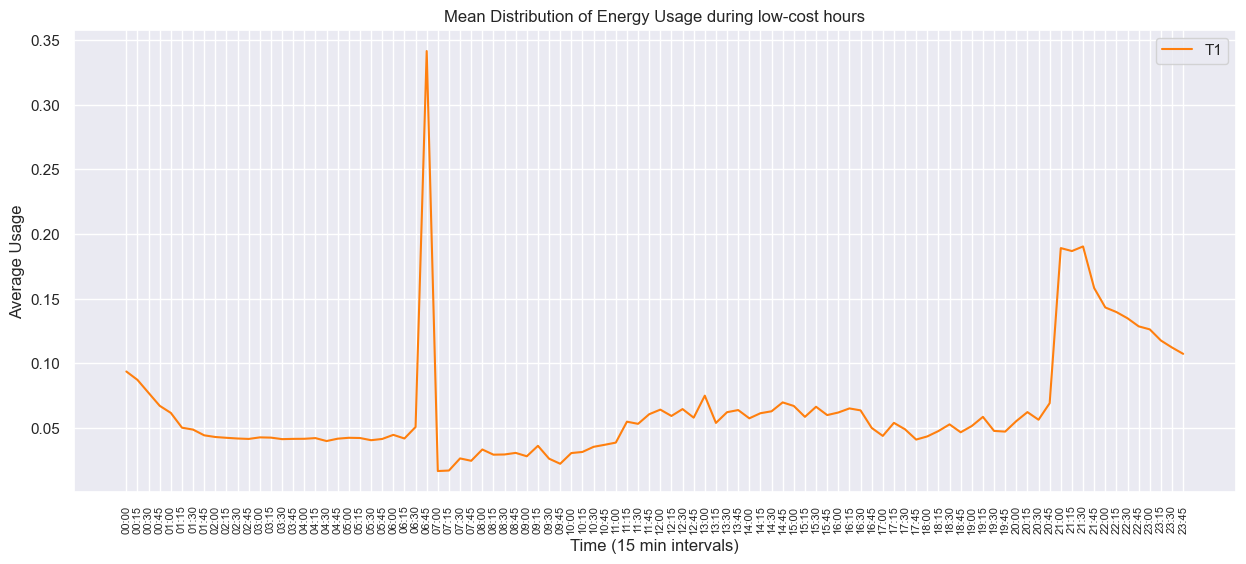

In [82]:
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(mean_values.index, mean_values['T1'], label='T1', color = '#ff7f0e')
ax.set_xlabel('Time (15 min intervals)')
ax.set_ylabel('Average Usage')
ax.set_title('Mean Distribution of Energy Usage during low-cost hours')
ax.legend()

uni_time = merged1.index.get_level_values('Time').unique()
ax.set_xticks(range(len(uni_time)))
ax.set_xticklabels([label[:-3] for label in uni_time], rotation=90, fontsize=8)

plt.show()

### Comments on P1e Visualization 1 

Upon analyzing the provided plot, several key observations can be made regarding average energy usage during low-cost hours. The data reveals a range of 0.02 to 0.35 m3, signifying daily fluctuations in electricity consumption during these time periods.
Notably, a consistent pattern emerges within the range of 0.00 to 0.10 m3 for electricity usage between 00:00 and 06:30, as well as from 07:00 to 20:30. Interestingly, the highest recorded energy value is observed at 06:45. Additionally, we observe a surge between 21:00 and 21:30.
Overall, the average electricity usage during low-cost hours remains relatively low in terms of m3, with the exception of two notable peaks at 06:45 and from 20:00 to 21:30.

### P1e Visualization 2

### Energy usage in high-cost hours ('T2')


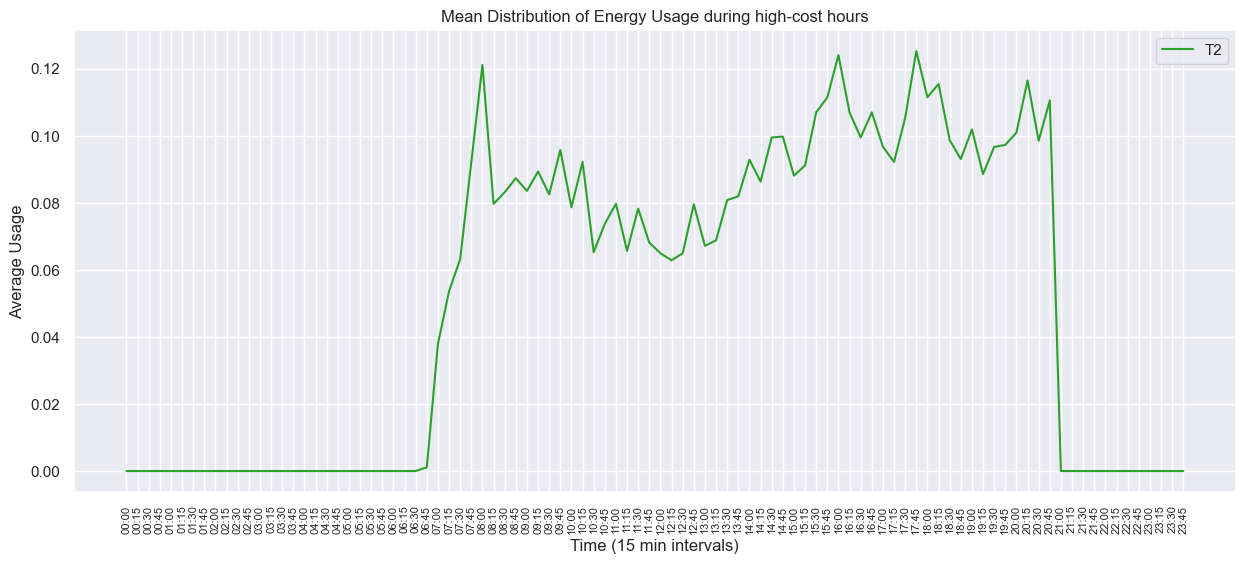

In [83]:
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(mean_values.index, mean_values['T2'], label='T2', color = '#2ca02c')
ax.set_xlabel('Time (15 min intervals)')
ax.set_ylabel('Average Usage')
ax.set_title('Mean Distribution of Energy Usage during high-cost hours')
ax.legend()

uni_time = merged1.index.get_level_values('Time').unique()
ax.set_xticks(range(len(uni_time)))
ax.set_xticklabels([label[:-3] for label in uni_time], rotation=90, fontsize=8)

plt.show()

### Comments on P1e Visualization 2 

By analyzing the the above plot, it becomes apparent that the average energy usage during high-cost hours exhibits a narrow range of 0.00 to 0.12 m3, indicating minimal fluctuations in daily electricity consumption on average.
Interestingly, a contrasting pattern emerges when compared to the electricity usage during low-cost hours. From 21:00 to 06:30 the electricity usage for the high-cost hours is consistent at 0.00 m3 indicating that those hours the low-cost electricity is available during these hours. As for the hours from 6:45 to 20:45, the average electricity usage (high-cost hours) reaches its highest values. During working hours it drops a little bit, followed by another increase until early evening.


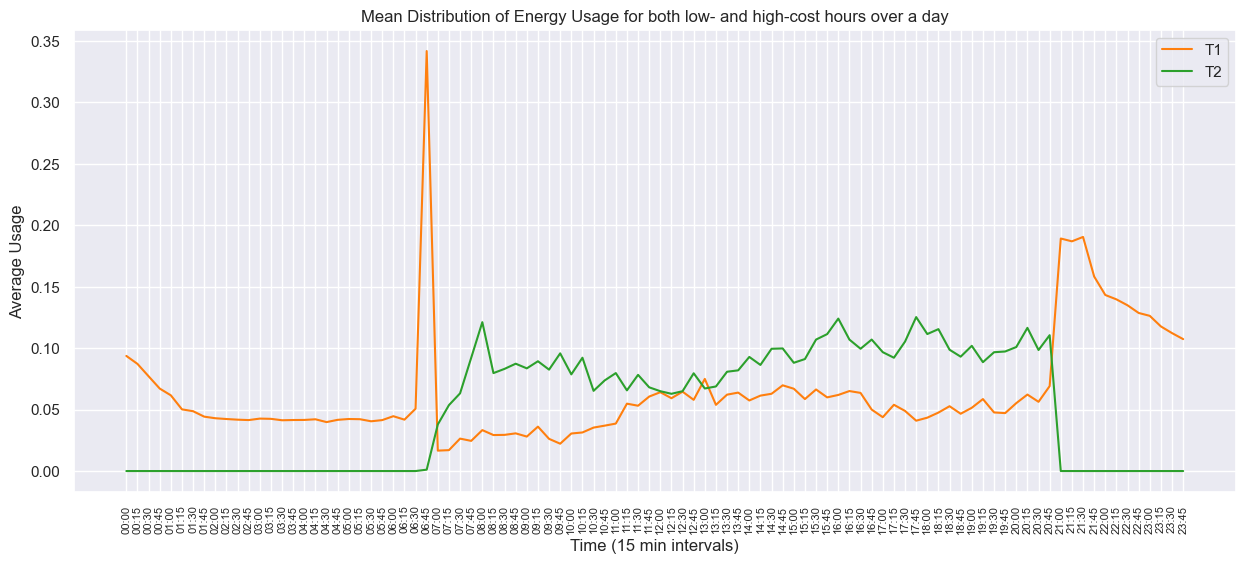

In [84]:
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(mean_values.index, mean_values['T1'], label='T1', color = '#ff7f0e')
ax.plot(mean_values.index, mean_values['T2'], label='T2', color = '#2ca02c')
ax.set_xlabel('Time (15 min intervals)')
ax.set_ylabel('Average Usage')
ax.set_title('Mean Distribution of Energy Usage for both low- and high-cost hours over a day')
ax.legend()

uni_time = merged1.index.get_level_values('Time').unique()
ax.set_xticks(range(len(uni_time)))
ax.set_xticklabels([label[:-3] for label in uni_time], rotation=90, fontsize=8)

plt.show()

Here we can see that the electricity usage for low- and high- cost hours does not differ much from 07:00 to 20:45.

# Tables

In this part of the report, some tables regarding electricity and gas will be discussed. Specifically, we created the summary statistics for the total gas and energy usage ('T1' and 'T2') for every fifteen minutes measurement. That way we can examine further the patterns and have specific numbers in addition to the previously discussed visualizations.

## P1G: Gas Usage

This statistical table shows a summary of the average total gas consumption at different times of the day. The dataset contains 125 observations at each time point, except for a few cases with 124 observations.
The analysis revealed an interesting pattern of gas consumption during the day. At 06:30, the average total gas consumption is 0.18 with a standard deviation of 0.10. The minimum value is 0.0, and the quartiles mean that 25% of the data are below 0.10, 50% below 0.19, and 75% below 0.26. The maximum value at this point is 0.46.
Similarly, the average gas consumption at 21:30 is 0.16 with a slightly higher standard deviation of 0.15. The minimum value remains 0.0, and the quartiles indicate that 25% of the data are below 0.08, 50% below 0.11, and 75% below 0.17. The maximum value at this point is 0.67.


### P1G TABLE 1

In [64]:
pd.set_option('display.max_rows', None)
merged1.groupby('Time').describe()['TotalGas'].round(2).sort_values(by='mean', ascending=False)


,count,mean,std,min,25%,50%,75%,max
Time,,,,,,,,
06:30:00,125.0,0.18,0.10,0.0,0.10,0.19,0.26,0.46
21:30:00,125.0,0.16,0.15,0.0,0.08,0.11,0.17,0.67
21:00:00,125.0,0.15,0.14,0.0,0.09,0.11,0.15,0.64
21:15:00,125.0,0.14,0.12,0.0,0.07,0.12,0.17,0.57
20:45:00,125.0,0.13,0.14,0.0,0.06,0.09,0.12,0.71
21:45:00,124.0,0.12,0.14,0.0,0.05,0.09,0.12,0.95
22:45:00,124.0,0.10,0.15,0.0,0.01,0.04,0.09,0.82
20:30:00,125.0,0.10,0.11,0.0,0.05,0.07,0.10,0.60
06:15:00,125.0,0.10,0.05,0.0,0.06,0.10,0.13,0.23


## P1E: Energy Usage

### P1E TABLE 1 - T1

The table provides a summary of the mean electricity usage during low-cost hours at various time intervals.
The analysis reveals that electricity usage during the low-cost hours varies across different time intervals. The highest mean electricity usage is observed at 06:45 with a value of 0.34, while the lowest mean usage is recorded at 07:30 with a value of 0.03.
The standard deviation indicates the level of variation in electricity usage within each time interval. The values range from 0.01 to 0.21, reflecting varying degrees of consistency in consumption patterns.
The minimum and maximum values represent the lowest and highest electricity usage recorded during the low-cost hours. The minimum values range from 0.00 to 0.03, while the maximum values range from 0.32 to 1.43.
Overall, the data highlights the fluctuation in electricity usage during low-cost hours, as we saw in the plots above.

In [66]:
pd.set_option('display.max_rows', None)
merged1.groupby('Time').describe()['T1'].round(2).sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
Time,,,,,,,,
06:45:00,125.0,0.34,0.18,0.02,0.38,0.41,0.45,0.59
21:30:00,125.0,0.19,0.21,0.02,0.07,0.10,0.19,1.24
21:15:00,125.0,0.19,0.19,0.02,0.07,0.11,0.23,1.01
21:00:00,125.0,0.19,0.19,0.02,0.07,0.11,0.24,1.08
21:45:00,124.0,0.16,0.13,0.02,0.07,0.11,0.21,0.68
22:15:00,124.0,0.14,0.13,0.02,0.07,0.10,0.15,0.71
22:00:00,124.0,0.14,0.13,0.02,0.07,0.10,0.16,0.74
23:00:00,124.0,0.13,0.10,0.02,0.07,0.09,0.14,0.68
22:45:00,124.0,0.13,0.13,0.02,0.06,0.09,0.14,0.92


### P1E TABLE 2 - T2

The table presents the mean electricity usage during high-cost hours. The dataset consists of 125 observations for each time period. 
Among the high-cost hours, the time period 17:45 shows the highest mean electricity usage, with an average of 0.13 units. It is closely followed by 16:00 and 08:00, both with mean values of 0.12 units.
The electricity usage during these high-cost hours generally ranges from 0.0 to 1.05 units, with some time intervals displaying a higher variability than others. The 25th and 75th percentiles indicate that the majority of observations fall within the range of 0.06 to 0.14 units.
It is important to note that there are several time intervals, particularly during the late evening and early morning hours, where the mean electricity usage drops to zero, probably suggesting no consumption during these periods.

In [68]:
pd.set_option('display.max_rows', None)
merged1.groupby('Time').describe()['T2'].round(2).sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
Time,,,,,,,,
17:45:00,125.0,0.13,0.18,0.0,0.0,0.07,0.14,0.92
16:00:00,126.0,0.12,0.19,0.0,0.0,0.06,0.13,1.05
08:00:00,125.0,0.12,0.14,0.0,0.0,0.08,0.17,0.69
20:15:00,125.0,0.12,0.14,0.0,0.0,0.08,0.17,0.79
18:15:00,125.0,0.12,0.15,0.0,0.0,0.07,0.13,0.87
16:15:00,125.0,0.11,0.16,0.0,0.0,0.06,0.13,1.06
15:45:00,125.0,0.11,0.18,0.0,0.0,0.05,0.11,1.00
15:30:00,125.0,0.11,0.15,0.0,0.0,0.06,0.14,0.82
16:45:00,125.0,0.11,0.14,0.0,0.0,0.07,0.14,0.83


## Conclusion:

In conclusion, our analysis showed the patterns and trends in electricity and gas consumption during different hours. During low-cost hours, the average electricity usage displays fluctuations within the range of 0.02 to 0.34 m3, with a notable stable pattern between 00:00 and 06:30, as well as from 07:00 to 20:30. However, two peak periods stand out at 06:45 and from 20:00 to 21:30, indicating higher energy consumption during these times. Notably, electricity usage during high-cost hours remains relatively steady, with minimal variations within the range of 0.00 to 0.13 m3. Between 21:00 and 06:30, electricity usage consistently remains at 0.00, signifying the availability of low-cost electricity during those hours, while peak consumption occurs between 6:45 and 20:45, with a slight dip during working hours followed by an increase until early evening.
Regarding gas usage, our analysis reveals that the highest consumption levels occur during the wake-up hours and before bedtime, with an additional surge in usage during the afternoon. 

